# K-means Clustering

### Import resources and display image

images/oranges_orig.jpg


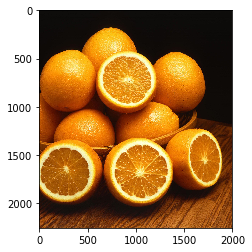

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import glob

%matplotlib inline

# Read in the image
## TODO: Check out the images directory to see other images you can work with

im_list = []
im_name_list = []

for file in glob.glob(os.path.join('images', "*")):
    im_list.append(cv2.imread(file))
    im_name_list.append(file)

# And select one!
#image = cv2.imread('images/monarch.jpg')
im_ix = 0

# Change color to RGB (from BGR)
print(im_name_list[im_ix])
image = cv2.cvtColor(im_list[im_ix], cv2.COLOR_BGR2RGB)

plt.imshow(image)

### Prepare data for k-means

In [64]:
# Reshape image into a 2D array of pixels and 3 color values (RGB)
print(image.shape)
pixel_vals = image.reshape((-1,3))
print(pixel_vals.shape)

# Convert to float type
pixel_vals = np.float32(pixel_vals)

(2254, 1999, 3)
(4505746, 3)


### Implement k-means clustering

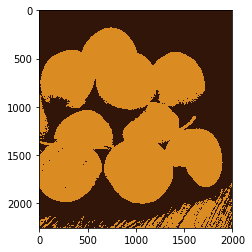

In [65]:
# define stopping criteria
# you can change the number of max iterations for faster convergence!
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

## TODO: Select a value for k
# then perform k-means clustering
k = 2
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
labels_reshape = labels.reshape(image.shape[0], image.shape[1])

plt.imshow(segmented_image)

*cv2.TERM_CRITERIA_EPS* & *cv2.TERM_CRITERIA_MAX_ITER* are integer types and each is 2 & 1, repsectively.

In [66]:
# list[[1,1,1]] is not allowed.
test = [1,2,3]
result = list[1] 

# numpy[[1,1,1]] is allowed.
# numpy는 단순한 인덱스 기능을 넘어서서 인덱스 인자들을 모아서 새로운 행렬도 만들어준다.
test = np.array([[1],2,3])
result = test[[0,1,1]]

print(result)

[[1] 2 2]


In [83]:
# numpy가 값을 받는 경우 인덱스로 어떤 행렬을 건네주던 안의 index의 중복을 없앤 후 해당 인덱스에 값을 할당한다.
test = np.array([1,2,3])
test[[1,1,1,1,1]] = 1

print(test)

[1 1 3]


In [84]:
print('criteria:', criteria)
print('retval', retval, 'retval type:', type(retval))
print('labels shape is', labels.shape, 'and the type is', type(labels))
print('When k is', k,'center is\n', centers)
print('labels.flatten result is :', labels.flatten(), 'and the shape is', labels.flatten().shape)
print('segmented data shape is', segmented_data.shape, 'and the result is\n', segmented_data)
print('image.shape :', image.shape)
print('labels_reshape shape is', labels_reshape.shape, 'and the result is\n', labels_reshape)

criteria: (3, 100, 0.2)
retval 19562788528.499275 retval type: <class 'float'>
labels shape is (4505746, 1) and the type is <class 'numpy.ndarray'>
When k is 2 center is
 [[218 140  34]
 [ 48  21   8]]
labels.flatten result is : [1 1 1 ..., 1 0 0] and the shape is (4505746,)
segmented data shape is (4505746, 3) and the result is
 [[ 48  21   8]
 [ 48  21   8]
 [ 48  21   8]
 ..., 
 [ 48  21   8]
 [218 140  34]
 [218 140  34]]
image.shape : (2254, 1999, 3)
labels_reshape shape is (2254, 1999) and the result is
 [[1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 ..., 
 [1 1 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [1 1 1 ..., 1 0 0]]


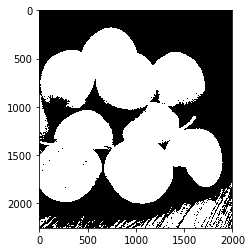

In [85]:
## TODO: Visualize one segment, try to find which is the leaves, background, etc!
plt.imshow(labels_reshape==0, cmap='gray')

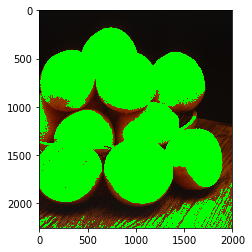

In [86]:
# mask an image segment by cluster

cluster = 0 # the first cluster

masked_image = np.copy(image)
# turn the mask green!
masked_image[labels_reshape == cluster] = [0, 255, 0]

plt.imshow(masked_image)